In [ ]:
pip install --upgrade azure-ai-anomalydetector

In [1]:
import os
from azure.ai.anomalydetector import AnomalyDetectorClient
from azure.ai.anomalydetector.models import DetectRequest, TimeSeriesPoint, TimeGranularity, \
    AnomalyDetectorError
from azure.core.credentials import AzureKeyCredential
import pandas as pd

In [2]:
SUBSCRIPTION_KEY = '341fde4ed25545d9aa6526778de2f709'
ANOMALY_DETECTOR_ENDPOINT = 'https://myanomalydet.cognitiveservices.azure.com/'
TIME_SERIES_DATA_PATH = os.path.join(r"C:\Users\sahar", "request-data.csv")

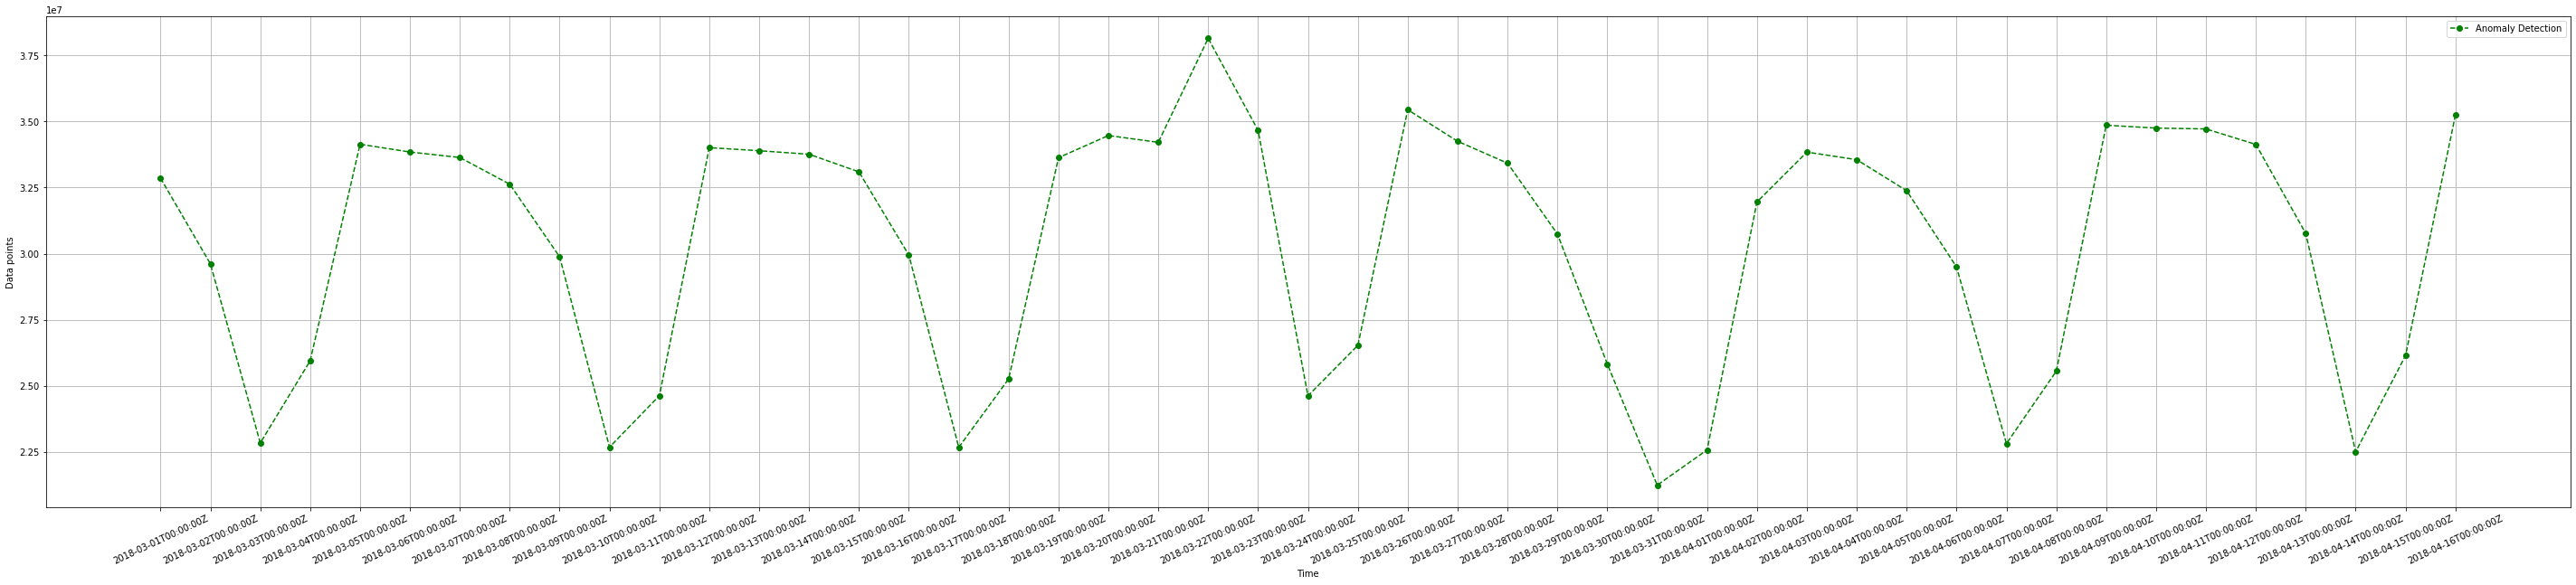

In [3]:
import matplotlib.pyplot as plt
import csv
  
x = []
y = []
  
with open('request-data.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(int(row[1]))
        
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(10)
  
plt.plot(x, y, color = 'g', linestyle = 'dashed',
         marker = 'o',label = "Anomaly Detection")
  
plt.xticks(rotation = 25)
plt.xlabel('Time')
plt.ylabel('Data points')
plt.grid()
plt.legend()
plt.show()

In [4]:
client = AnomalyDetectorClient(AzureKeyCredential(SUBSCRIPTION_KEY), ANOMALY_DETECTOR_ENDPOINT)

In [5]:
series = []
data_file = pd.read_csv(TIME_SERIES_DATA_PATH, header=None, encoding='utf-8', parse_dates=[0])
for index, row in data_file.iterrows():
    series.append(TimeSeriesPoint(timestamp=row[0], value=row[1]))

In [6]:
request = DetectRequest(series=series, granularity=TimeGranularity.daily)

In [7]:
print('Detecting anomalies in the entire time series.')

try:
    response = client.detect_entire_series(request)
except AnomalyDetectorError as e:
    print('Error code: {}'.format(e.error.code), 'Error message: {}'.format(e.error.message))
except Exception as e:
    print(e)

if any(response.is_anomaly):
    print('An anomaly was detected at index:')
    for i, value in enumerate(response.is_anomaly):
        if value:
            print(i)
else:
    print('No anomalies were detected in the time series.')

Detecting anomalies in the entire time series.
An anomaly was detected at index:
3
18
21
22
23
24
25
28
29
30
31
32
35
44


In [8]:
print('Detecting the anomaly status of the last data point.')

try:
    response = client.detect_last_point(request)
except AnomalyDetectorError as e:
    print('Error code: {}'.format(e.error.code), 'Error message: {}'.format(e.error.message))
except Exception as e:
    print(e)

if response.is_anomaly:
    print('The last point is detected as anomaly.')
else:
    print('The last point is not detected as anomaly.')

Detecting the anomaly status of the last data point.
The last point is not detected as anomaly.


In [9]:
print('Detecting change points in the entire time series.')

try:
    response = client.detect_change_point(request)
except AnomalyDetectorError as e:
    print('Error code: {}'.format(e.error.code), 'Error message: {}'.format(e.error.message))
except Exception as e:
    print(e)

if any(response.is_change_point):
    print('An change point was detected at index:')
    for i, value in enumerate(response.is_change_point):
        if value:
            print(i)
else:
    print('No change point were detected in the time series.')

Detecting change points in the entire time series.
An change point was detected at index:
20
27
